In [2]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf

In [3]:
#import the data
HEC = yf.Ticker("ALI=F")

In [4]:
data = yf.download("ALI=F", start="2017-01-01", end="2022-08-10")['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [6]:
data.head()

Date
2017-01-03    1792.50
2017-01-04    1793.75
2017-01-05    1810.25
2017-01-06    1803.00
2017-01-09    1820.25
Name: Adj Close, dtype: float64

In [7]:
data.tail()

Date
2022-08-03    2349.50
2022-08-04    2372.75
2022-08-05    2396.75
2022-08-08    2427.50
2022-08-09    2470.75
Name: Adj Close, dtype: float64

In [8]:
log_returns = np.log(1 + data.pct_change())

In [9]:
log_returns.tail()

Date
2022-08-03   -0.015625
2022-08-04    0.009847
2022-08-05    0.010064
2022-08-08    0.012748
2022-08-09    0.017660
Name: Adj Close, dtype: float64

Text(0, 0.5, 'Price USD')

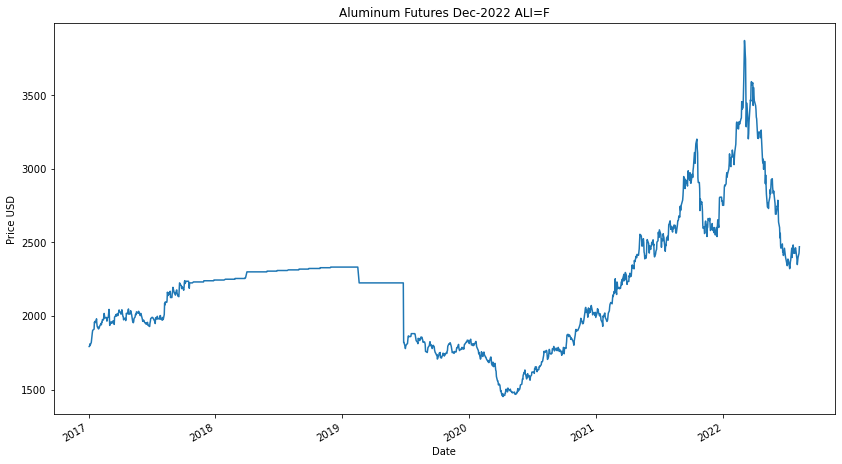

In [10]:
data.plot(figsize=(14,8))
plt.title('Aluminum Futures Dec-2022 ALI=F')
plt.ylabel('Price USD')

In [11]:
u = log_returns.mean()
u

0.00022840601763880183

In [12]:
var = log_returns.var()
var

0.000146605942705502

In [13]:
stdev = log_returns.std()
stdev

0.012108094098804402

In [14]:
drift = u - (0.5 * var)
drift

0.00015510304628605083

In [15]:
np.array(drift)

array(0.0001551)

In [16]:
np.array(stdev)

array(0.01210809)

In [17]:
#set up a 96% chance of occurance
norm.ppf(0.96)

1.7506860712521692

In [18]:
x = np.random.rand(10,2)
x

array([[0.83754264, 0.55376381],
       [0.01128834, 0.57704554],
       [0.82124453, 0.33199033],
       [0.980282  , 0.20839523],
       [0.87109715, 0.92018615],
       [0.97823947, 0.71143653],
       [0.02845749, 0.29568307],
       [0.08454933, 0.58722701],
       [0.8125054 , 0.4198403 ],
       [0.63178566, 0.02609129]])

In [19]:
norm.ppf(x)

array([[ 0.98440848,  0.13517642],
       [-2.28052318,  0.19434095],
       [ 0.92011831, -0.43442387],
       [ 2.05960829, -0.81200203],
       [ 1.13159274,  1.4063248 ],
       [ 2.01867456,  0.55758627],
       [-1.90396323, -0.53685737],
       [-1.37510573,  0.22041755],
       [ 0.88716663, -0.20230205],
       [ 0.33658645, -1.94162452]])

In [20]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 0.57134024,  0.11002335],
       [-0.33843722,  1.82807274],
       [ 1.34038269, -1.28099931],
       [-0.05749   ,  0.72254987],
       [-1.13862047,  1.43018534],
       [ 0.57239395,  0.58481727],
       [-0.38268179,  0.65678688],
       [-0.24009389, -1.72503301],
       [ 0.26655958,  0.36376428],
       [-1.92859071, -1.09702076]])

In [21]:
t_intervals = 120
interations = 500

In [22]:
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, interations)))
daily_returns

array([[1.00155008, 1.00649279, 0.9886692 , ..., 0.99341321, 1.00558511,
        0.99915025],
       [0.98751616, 1.00704963, 1.00897789, ..., 0.99933911, 0.99677418,
        1.01776479],
       [1.00482082, 1.01725818, 0.99844861, ..., 0.98446358, 1.00431151,
        1.00728199],
       ...,
       [1.01691916, 1.00612823, 0.98475854, ..., 1.01325059, 1.0026224 ,
        0.99182583],
       [0.98926595, 0.99486746, 0.99557514, ..., 1.00626905, 0.98524814,
        1.0037335 ],
       [0.99230212, 0.99969183, 1.0089356 , ..., 1.0167975 , 0.97341749,
        0.99165193]])

In [23]:
s_zero = data.iloc[-1]
s_zero

2470.75

In [24]:
price_list = np.zeros_like(daily_returns)

In [25]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
price_list[0] = s_zero
price_list

array([[2470.75, 2470.75, 2470.75, ..., 2470.75, 2470.75, 2470.75],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       ...,
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ]])

In [27]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [28]:
price_list

array([[2470.75      , 2470.75      , 2470.75      , ..., 2470.75      ,
        2470.75      , 2470.75      ],
       [2439.9055501 , 2488.16786293, 2492.9321119 , ..., 2469.11709449,
        2462.77979954, 2514.64234432],
       [2451.6678907 , 2531.10910524, 2489.06459184, ..., 2430.75586481,
        2473.39809166, 2532.95395634],
       ...,
       [3339.26597017, 2373.63268094, 2398.47405101, ..., 2382.78477091,
        3032.96765105, 2353.23128693],
       [3303.42212454, 2361.44990685, 2387.86114469, ..., 2397.7225721 ,
        2988.22575096, 2362.01708452],
       [3277.99277853, 2360.7221889 , 2409.19812854, ..., 2437.99832778,
        2908.79121931, 2342.29880926]])

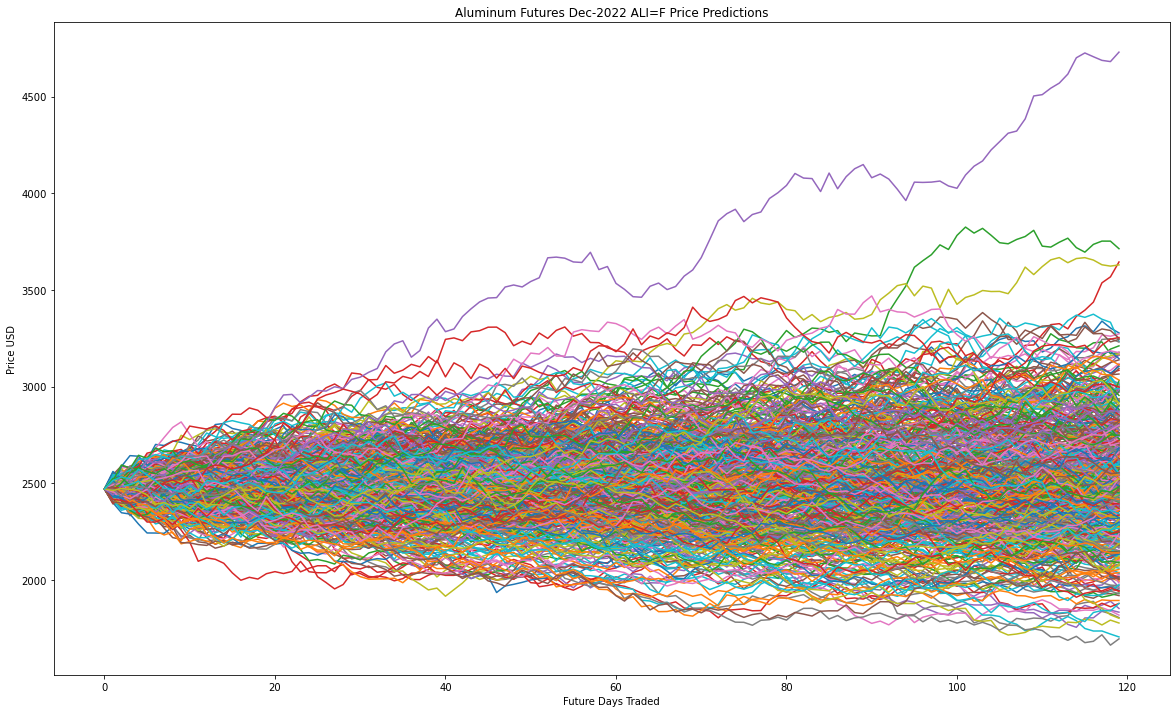

In [29]:
plt.figure(figsize=(20,12))
plt.title('Aluminum Futures Dec-2022 ALI=F Price Predictions')
plt.xlabel('Future Days Traded')
plt.ylabel('Price USD')
plt.plot(price_list)